# 이미지 전처리
* 이 코드는 이미지를 불러와서 일정 영역으로 자른 뒤 

픽셀값이 있는 부분의 거리를 근사적으로 구하는 코드입니다.

In [ ]:
# 라이브러리 가져오기
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
workpath = "/content/drive/Shareddrives/LG-Deeplearning/Weld_PCR/"

In [ ]:
#파일 목록 확인
os.listdir(workpath)

['Baron_PCR',
 'Essence_PCR',
 'Crop_Baron_PCR',
 'manual preprocessing screenshot']

In [ ]:
#Baron_PCR 폴더 경로를 변수 path1로 지정
path1 = workpath + 'Baron_PCR/'

In [ ]:
#path1 안의 파일목록을 변수로 지정
filelist_baron = os.listdir(path1)

In [ ]:
#파일 확인
filelist_baron[0:5]

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

## 이미지 하나에 대해서 작업

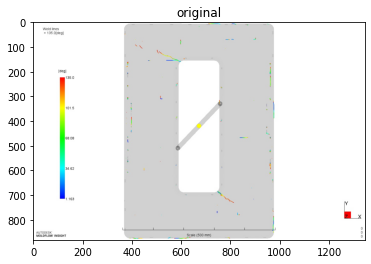

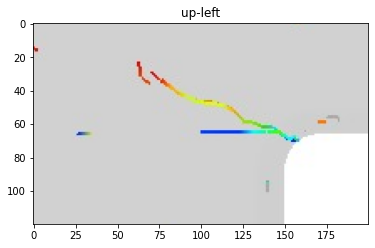

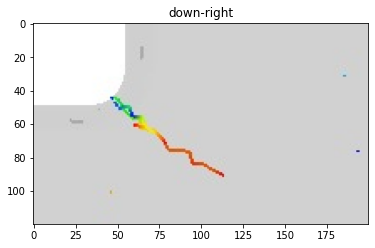

In [ ]:
# 테스트용 파일 임의로 설정
testfilename = str(62)+'.jpg'

# opencv 라이브러리로 이미지 읽고 BGR순서를 RGB순서로 변환
org = cv2.imread(path1+testfilename)
img = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)

# 범위설정
# x1=470; w1=140; y1=100; h1=80;
# x2=730; w2=140; y2=665; h2=100;

#범위를 이전 코드에 비해 약간 넓게 잡았습니다.
x1=440; w1=200; y1=90; h1=120;
x2=700; w2=200; y2=640; h2=120;

crop1 = img[y1:y1+h1, x1:x1+w1]
crop2 = img[y2:y2+h2, x2:x2+w2]

#시각화
plt.imshow(img)
plt.title('original')
plt.show()
plt.imshow(crop1)
plt.title('up-left')
plt.show()
plt.imshow(crop2)
plt.title('down-right')
plt.show()

In [ ]:
#Crop Image 전체 저장용 코드
# for i in range(0,64): ###### 64는 이미지 개수가 64이므로 64로 설정. 이미지 개수가 100이면 100으로 바꿔줘야 됩니다.
#     testfilename = str(i+1)+'.jpg'
    
#     # opencv 라이브러리로 이미지 읽고 BGR순서를 RGB순서로 변환
#     org = cv2.imread(path1 + testfilename) ############## 여기서는 Baron PCR로 작업했으므로 그 경로에 해당하는 path1변수를 썼으나 다른 폴더의 그림으로 작업하려면 그에 맞는 경로를 변수로 지정하여 써줘야 합니다.
    
#     # 범위설정
#     x1=440; w1=200; y1=90; h1=120;
#     x2=700; w2=200; y2=640; h2=120;
    
#     crop1 = org[y1:y1+h1, x1:x1+w1]
#     crop2 = org[y2:y2+h2, x2:x2+w2]
    
#     imname1 = './crop1rgb_'+str(i+1)+'.jpg'             ########### 경로에서 ./은 현재 작업경로를 의미합니다.
#     imname2 = './crop2rgb_'+str(i+1)+'.jpg'    
    
#     cv2.imwrite(imname1, crop1)
#     cv2.imwrite(imname2, crop2)


## 수동 이미지 전처리
* 이 작업은 개인용 컴퓨터(구글드라이브의 이미지를 컴퓨터로 다운로드)에서 그림판 3D를 이용하여 수동(사람의 손)으로 노이즈를 제거하는 작업입니다. 유동(?)의 정확한 시작점 예측을 위해서는 반드시 수작업으로 노이즈를 제거해야 합니다. 

* 1. 저장된 crop 이미지를 마우스 우클릭하여 그림판 3D로 편집을 클릭합니다.
![대체 텍스트](https://drive.google.com/uc?export=view&id=1tQDf_QTtb8kPulmxnNsc9Yuc-6wnK5Zp)

* 2. 빨간색으로 표시된 부분처럼 마커(브러쉬)의 색깔을 연한 회색으로 선택합니다.
연한 회색은 확인해보면 R,G,B값이 195,195,195로 설정되어 있는 것을 확인할 수 있습니다. (밑에 있는 코드 중에 RGB값을 이용하여 회색을 검은색으로 처리하는 코드가 있습니다.)
![대체 텍스트](https://drive.google.com/uc?export=view&id=1tCzA_3rgbmswAvwxorJOT--4Mj4H_y0J)
![대체 텍스트](https://drive.google.com/uc?export=view&id=1mFSWYtl746WSEmxvN53y-3Nhgia6Yh-e)


* 3. 노이즈 부분을 마커(브러쉬)로 회색으로 칠해주신 후 저장하시면 됩니다. 주의하실 점으로는 저장하실 때 검은색으로 표시된 마커의 위치를 이미지 밖으로 꺼낸 다음에 저장하시는 것이 좋습니다. (그림처럼 원형으로 된 마커 자국이 남습니다. 이 부분은 실수로 저장되더라도 크기가 크지 않아 밑에 있는 코드 중 미디안 블러처리를 통해 아마 제거가 될 것으로 예상됩니다.)
![대체 텍스트](https://drive.google.com/uc?export=view&id=1L6r5F4UDybfqkUlEh5o5y_znZ7JrZAsn)


* 예를 들어 아래의 그림에 검은색으로 표시된 부분을 노이즈라 생각하여 수동으로 제거하면 그림은 다음과 같이 처리됩니다.
![대체 텍스트](https://drive.google.com/uc?export=view&id=1DNerWF88iMO1Ih9BSchjeVhfCoWMPrbE)
![대체 텍스트](https://drive.google.com/uc?export=view&id=1Bk21BZZ8z8_m8qqJPl12qF2qGbgLcO4z)

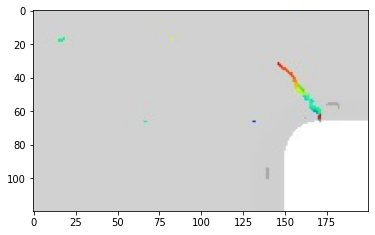

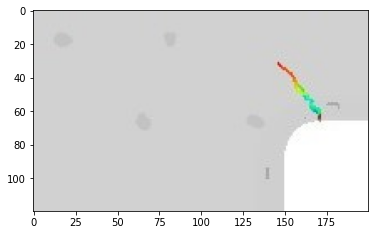

33


In [ ]:
# 랜덤한 숫자를 생성하여 baron PCR crop 이미지와 baron PCR crop 이미지에서 수동으로 노이즈를 제거한 사진을 출력하는 코드입니다.
# 윗부분에 해당하는 그림이 출력됩니다.(여러번 실행해서 확인해주세요)
pathc = workpath+'Crop_Baron_PCR/'
n = np.random.randint(1,65)

beforename = str(n)+'.jpg'
aftername = 'crop1_'+str(n)+'.jpg'
# opencv 라이브러리로 이미지 읽고 BGR순서를 RGB순서로 변환
org = cv2.imread(path1+beforename)
img = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)

# 범위설정
x1=440; w1=200; y1=90; h1=120;
x2=700; w2=200; y2=640; h2=120;

crop1 = img[y1:y1+h1, x1:x1+w1]
# crop2 = img[y2:y2+h2, x2:x2+w2]

#수동 전처리 후 이미지 불러오기
orgp = cv2.imread(pathc+aftername)
imgp = cv2.cvtColor(orgp, cv2.COLOR_BGR2RGB)

plt.imshow(crop1)
plt.show()
plt.imshow(imgp)
plt.show()
print(n)

pathc = workpath + 'Crop_Baron_PCR/'

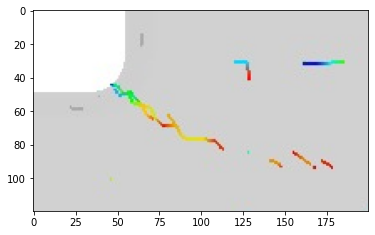

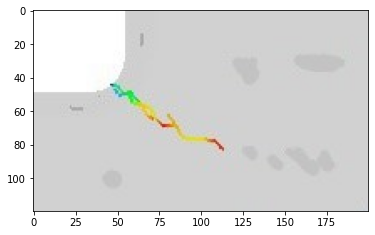

21


In [ ]:
# 랜덤한 숫자를 생성하여 baron PCR crop 이미지와 baron PCR crop 이미지에서 수동으로 노이즈를 제거한 사진을 출력하는 코드입니다.
# 아랫부분에 해당하는 그림이 출력됩니다.(여러번 실행해서 확인해주세요)
pathc = workpath+'Crop_Baron_PCR/'
pos = np.random.randint(1,3)
n = np.random.randint(1,65)
beforename = str(n)+'.jpg'
aftername = 'crop2_'+str(n)+'.jpg'
# opencv 라이브러리로 이미지 읽고 BGR순서를 RGB순서로 변환
org = cv2.imread(path1+beforename)
img = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)

# 범위설정
x1=440; w1=200; y1=90; h1=120;
x2=700; w2=200; y2=640; h2=120;

# crop1 = img[y1:y1+h1, x1:x1+w1]
crop2 = img[y2:y2+h2, x2:x2+w2]

#수동 전처리 후 이미지 불러오기
orgp = cv2.imread(pathc+aftername)
imgp = cv2.cvtColor(orgp, cv2.COLOR_BGR2RGB)

plt.imshow(crop2)
plt.show()
plt.imshow(imgp)
plt.show()    
print(n)

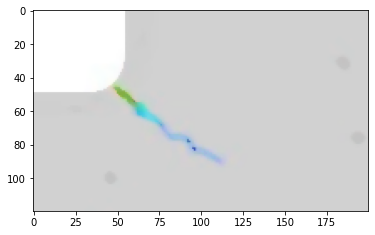

In [ ]:
# 노이즈 제거를 위한 미디안 블러처리
# 4x4픽셀의 점과 같은 노이즈를 제거하는지 확인하기 위해 median 필터를 필터 크기5로 적용합니다.
testimgname = 'crop2_'+str(62)+'.jpg'
crop2 = cv2.imread(pathc+testimgname)


img_blur1 = cv2.medianBlur(crop2, 5)
plt.imshow(img_blur1)
plt.show()


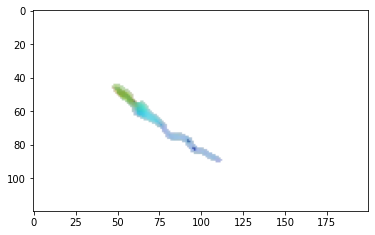

In [ ]:
# 시각화용으로 회색부분을 흰색(255)으로 처리해서 보여줍니다.
img1 = np.zeros_like(img_blur1)
for i in range(img_blur1.shape[0]):
    for j in range(img_blur1.shape[1]):
        if (img_blur1[i,j,:][0]>185) & (img_blur1[i,j,:][1]>185) & (img_blur1[i,j,:][2]>185):
            img1[i,j,:]=[255,255,255]
        else:
            img1[i,j,:]=img_blur1[i,j,:]
plt.imshow(img1)

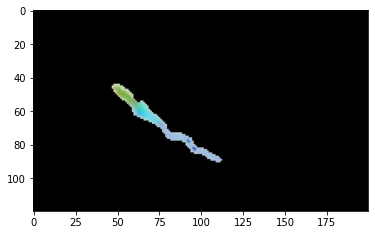

In [ ]:
# 실제 처리를 위해 회색부분을 검은색(0)으로 처리해서 보여줍니다.
img1 = np.zeros_like(img_blur1)
for i in range(img_blur1.shape[0]):
    for j in range(img_blur1.shape[1]):
        if (img_blur1[i,j,:][0]>185) & (img_blur1[i,j,:][1]>185) & (img_blur1[i,j,:][2]>185):
            img1[i,j,:]=[0,0,0]
        else:
            img1[i,j,:]=img_blur1[i,j,:]
plt.imshow(img1)

원본 shape: (120, 200, 3), 흑백 shape: (120, 200)


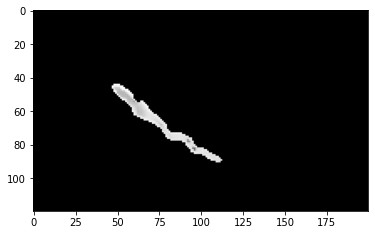

In [ ]:
# 거리와 각도 계산시 쉬운 처리를 위해 3채널 rgb이미지를 2채널 grayscale 이미지로 바꿔줍니다.
img_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')
print(f'원본 shape: {img1.shape}, 흑백 shape: {img_gray.shape}')

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  5.  6.  7.  8.  8.  9.
  8.  8.  9.  9.  9. 11. 10.  9.  9.  9. 11. 11. 11. 10.  9.  8.  7.  7.
  6.  7.  7.  6.  6.  7.  7.  8.  6.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  6.  7.  7.  9.  7.  6.  5.  4.  4.  4.  5.  4.  5.  5.  4.  5.  4.
  4.  4.  4.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


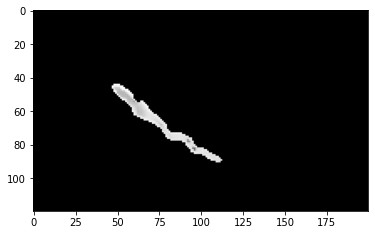

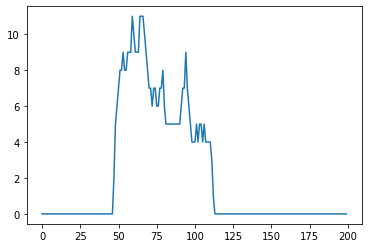

In [ ]:
# x축의 픽셀값이 0이 아닌 것의 개수를 세어 그래프로 보여줍니다.
data_x = np.zeros(img_gray.shape[1])
t_img = img_gray.T
n = 0
for i in t_img:
    data_x[n] = np.count_nonzero(i)
    n += 1

print(data_x)
plt.imshow(img_gray, 'gray')
plt.show()
plt.plot(range(img_gray.shape[1]), data_x)
plt.show()


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  4.  7.  8.  9. 10. 10. 10.  9.  8.  8.
  9. 11. 11. 11. 10. 11. 12. 12. 14. 13. 12. 11.  9.  8.  7.  6.  4.  4.
  5. 11. 12. 14. 15. 13.  7.  5.  6.  6.  9. 10. 11. 11.  8.  8.  8.  7.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


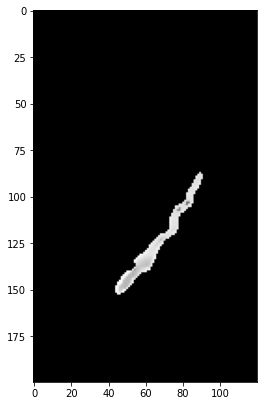

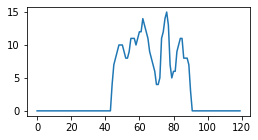

In [ ]:
# y축의 픽셀값이 0이 아닌 것의 개수를 세어 그래프로 보여줍니다.
data_y = np.zeros(img_gray.shape[0])

n = 0
for i in img_gray:
    data_y[n] = np.count_nonzero(i)
    n += 1

print(data_y)
plt.figure(figsize=(4,7))
plt.imshow(cv2.rotate(img_gray,2), 'gray')
plt.show()
plt.figure(figsize=(4,2))
plt.plot(range(img_gray.shape[0]), data_y)
plt.show()

In [ ]:
# data_x,y에 대해 0이 아닌것의 개수만을 세어 거리로 생각합니다.
nz_x = np.count_nonzero(data_x)
nz_y = np.count_nonzero(data_y)
distance = np.sqrt(np.square(nz_x)+np.square(nz_y))
deg = np.arctan(nz_y/nz_x)*180/np.pi



환산거리 : 65.34mm
각도 : 35.46도


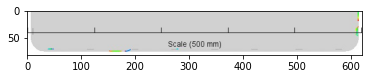

In [ ]:
# 거리환산
crop3 = img[800:1000, 362:982]
plt.imshow(crop3)
coef = 500/(982-362)
#거리와 각도를 소수점 둘째자리까지 표시
print(f'환산거리 : {coef*distance:.2f}mm')
print(f'각도 : {deg:.2f}도')

In [ ]:
# # 윗부분 코드
# xp1 = np.max(np.nonzero(data_x))
# yp1 = np.max(np.nonzero(data_y))
# xp2 = xp1-nz_x
# yp2 = yp1-nz_y

# p1 = (xp1, yp1)
# p2 = (xp2, yp2)

In [ ]:
# 아랫부분 코드
xp1 = np.min(np.nonzero(data_x))
yp1 = np.min(np.nonzero(data_y))
xp2 = xp1+nz_x
yp2 = yp1+nz_y

p1 = (xp1, yp1)
p2 = (xp2, yp2)

In [ ]:
nz_x, nz_y, xp1, yp1, xp2, yp2, p1, p2


(66, 47, 47, 44, 113, 91, (47, 44), (113, 91))

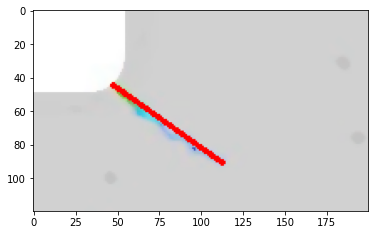

In [ ]:
import copy
testimg = copy.deepcopy(img_blur1)

a = cv2.line(testimg, p1,p2,(255,0,0), thickness=2)
plt.imshow(a)

### Baron PCR crop 이미지 중 윗부분 전체 이미지에 대해 처리하는 코드

In [ ]:
workpath = "/content/drive/Shareddrives/LG-Deeplearning/Weld_PCR/"
pathc = workpath+'Crop_Baron_PCR/'
coef = 500/(982-362)

y_bpcr1 = np.zeros((64,4))

for k in range(0,64):
    cropname1 = 'crop1_'+str(k+1)+'.jpg'
    org = cv2.imread(pathc+cropname1)
    img = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
    img_blur1 = cv2.medianBlur(img, 5)
    img1 = np.zeros_like(img_blur1)
    for i in range(img_blur1.shape[0]):
        for j in range(img_blur1.shape[1]):
            if (img_blur1[i,j,:][0]>185) & (img_blur1[i,j,:][1]>185) & (img_blur1[i,j,:][2]>185):
                img1[i,j,:]=[0,0,0]
            else:
                img1[i,j,:]=img_blur1[i,j,:]
    img_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    data_x = np.zeros(img_gray.shape[1])
    t_img = img_gray.T
    n = 0
    for i in t_img:
        data_x[n] = np.count_nonzero(i)
        n += 1
    
    data_y = np.zeros(img_gray.shape[0])

    n = 0
    for i in img_gray:
        data_y[n] = np.count_nonzero(i)
        n += 1
    
    nz_x = np.count_nonzero(data_x)
    nz_y = np.count_nonzero(data_y)
    distance = np.sqrt(np.square(nz_x)+np.square(nz_y))*coef
    deg = np.arctan(nz_y/nz_x)*180/np.pi
    y_bpcr1[k][0]=distance
    y_bpcr1[k][1]=deg
    
    xp1 = np.max(np.nonzero(data_x))
    yp1 = np.max(np.nonzero(data_y))
    xp2 = xp1-nz_x
    yp2 = yp1-nz_y
    
    p1 = (xp1, yp1)
    p2 = (xp2, yp2)
    
    y_bpcr1[k][2]=xp1
    y_bpcr1[k][3]=yp1
    
    testimg = copy.deepcopy(img_blur1)

    a = cv2.line(testimg, p1,p2,(255,0,0), thickness=2)
    linename = pathc+'BaronPCR1_'+str(k+1)+'.jpg'
    cv2.imwrite(linename, a)

### Baron PCR crop 이미지 중 아랫부분 전체 이미지에 대해 처리하는 코드

In [ ]:
workpath = "/content/drive/Shareddrives/LG-Deeplearning/Weld_PCR/"
pathc = workpath+'Crop_Baron_PCR/'
coef = 500/(982-362)

y_bpcr2 = np.zeros((64,4))

for k in range(0,64):
    cropname1 = 'crop2_'+str(k+1)+'.jpg'
    org = cv2.imread(pathc+cropname1)
    img = cv2.cvtColor(org, cv2.COLOR_BGR2RGB)
    img_blur1 = cv2.medianBlur(img, 5)
    img1 = np.zeros_like(img_blur1)
    for i in range(img_blur1.shape[0]):
        for j in range(img_blur1.shape[1]):
            if (img_blur1[i,j,:][0]>185) & (img_blur1[i,j,:][1]>185) & (img_blur1[i,j,:][2]>185):
                img1[i,j,:]=[0,0,0]
            else:
                img1[i,j,:]=img_blur1[i,j,:]
    img_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    data_x = np.zeros(img_gray.shape[1])
    t_img = img_gray.T
    n = 0
    for i in t_img:
        data_x[n] = np.count_nonzero(i)
        n += 1
    
    data_y = np.zeros(img_gray.shape[0])

    n = 0
    for i in img_gray:
        data_y[n] = np.count_nonzero(i)
        n += 1
    
    nz_x = np.count_nonzero(data_x)
    nz_y = np.count_nonzero(data_y)
    distance = np.sqrt(np.square(nz_x)+np.square(nz_y))*coef
    deg = np.arctan(nz_y/nz_x)*180/np.pi
    y_bpcr2[k][0]=distance
    y_bpcr2[k][1]=deg
    
    xp1 = np.min(np.nonzero(data_x))
    yp1 = np.min(np.nonzero(data_y))
    xp2 = xp1+nz_x
    yp2 = yp1+nz_y
    
    p1 = (xp1, yp1)
    p2 = (xp2, yp2)
    
    y_bpcr2[k][2]=xp1
    y_bpcr2[k][3]=yp1
    
    testimg = copy.deepcopy(img_blur1)

    a = cv2.line(testimg, p1,p2,(255,0,0), thickness=2)
    linename = pathc+'BaronPCR2_'+str(k+1)+'.jpg'
    cv2.imwrite(linename, a)